In [78]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities

## Importing and Combining Data
The following code imports the (cleaned) individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [79]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)
    
    return df

In [80]:
df_1998 = pd.read_csv('../data/clean/1998_Election_Data.csv')
df_2002 = pd.read_csv('../data/clean/2002_Election_Data.csv')
df_2006 = pd.read_csv('../data/clean/2006_Election_Data.csv')
df_2010 = pd.read_csv('../data/clean/2010_Election_Data.csv')
df_2014 = pd.read_csv('../data/clean/2014_Election_Data.csv')
df_2018 = pd.read_csv('../data/clean/2018_Election_Data.csv')
df_2018

Unnamed: 0  election_year  election_round place_(zz_=_exterior)  \
0              0           2018               1                    ZZ   
1              1           2018               1                    ZZ   
2              2           2018               1                    ZZ   
3              3           2018               1                    ZZ   
4              4           2018               1                    ZZ   
5              5           2018               1                    ZZ   
6              6           2018               1                    ZZ   
7              7           2018               1                    ZZ   
8              8           2018               1                    ZZ   
9              9           2018               1                    ZZ   
10            10           2018               1                    ZZ   
11            11           2018               1                    ZZ   
12            12           2018               1                    ZZ   
13            13           2018               1                    ZZ   
14            14           2018               1                    ZZ   
15            15           2018               1                    ZZ   
16            16           2018               1                    ZZ   
17            17           2018               1                    ZZ   
18            18           2018               1                    ZZ   
19            19           2018               2                    ZZ   
20            20           2018               2                    ZZ   
21            21           2018               2                    ZZ   
22            22           2018               1                    ZZ   
23            23           2018               1                    ZZ   
24            24           2018               1                    ZZ   
25            25           2018               1                    ZZ   
26            26           2018               1                    ZZ   
27            27           2018               1                    ZZ   
28            28           2018               1                    ZZ   
29            29           2018               2                    ZZ   
30            30           2018               2                    ZZ   
31            31           2018               2                    ZZ   
32            32           2018               2                    ZZ   
33            33           2018               1                    ZZ   
34            34           2018               1                    ZZ   
35            35           2018               2                    ZZ   
36            36           2018               1                    ZZ   
37            37           2018               1                    ZZ   
38            38           2018               1                    ZZ   
39            39           2018               1                    ZZ   
40            40           2018               1                    ZZ   
41            41           2018               1                    ZZ   
42            42           2018               1                    ZZ   
43            43           2018               2                    ZZ   
44            44           2018               2                    ZZ   
45            45           2018               2                    ZZ   
46            46           2018               1                    ZZ   
47            47           2018               1                    ZZ   
48            48           2018               1                    ZZ   
49            49           2018               2                    ZZ   
50            50           2018               2                    ZZ   
51            51           2018               2                    ZZ   
52            52           2018               1                    ZZ   
53            53           2018               1                 

In [81]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
print("Aggregate Data")
df_combined

Aggregate Data


Unnamed: 0  election_year  election_round place_(zz_=_exterior)  \
0              0           1998               1                    ZZ   
1              1           1998               1                    ZZ   
2              2           1998               1                    ZZ   
3              3           1998               1                    ZZ   
4              4           1998               1                    ZZ   
5              5           1998               1                    ZZ   
6              6           1998               1                    ZZ   
7              7           1998               1                    ZZ   
8              8           1998               1                    ZZ   
9              9           1998               1                    ZZ   
10            10           1998               1                    ZZ   
11            11           1998               1                    ZZ   
12            12           1998               1                    ZZ   
13            13           1998               1                    ZZ   
14            14           1998               1                    ZZ   
15            15           1998               1                    ZZ   
16            16           1998               1                    ZZ   
17            17           1998               1                    ZZ   
18            18           1998               1                    ZZ   
19            19           1998               1                    ZZ   
20            20           1998               1                    ZZ   
21            21           1998               1                    ZZ   
22            22           1998               1                    ZZ   
23            23           1998               1                    ZZ   
24            24           1998               1                    ZZ   
25            25           1998               1                    ZZ   
26            26           1998               1                    ZZ   
27            27           1998               1                    ZZ   
28            28           1998               1                    ZZ   
29            29           1998               1                    ZZ   
30            30           1998               1                    ZZ   
31            31           1998               1                    ZZ   
32            32           1998               1                    ZZ   
33            33           1998               1                    ZZ   
34            34           1998               1                    ZZ   
35            35           1998               1                    ZZ   
36            36           1998               1                    ZZ   
37            37           1998               1                    ZZ   
38            38           1998               1                    ZZ   
39            39           1998               1                    ZZ   
40            40           1998               1                    ZZ   
41            41           1998               1                    ZZ   
42            42           1998               1                    ZZ   
43            43           1998               1                    ZZ   
44            44           1998               1                    ZZ   
45            45           1998               1                    ZZ   
46            46           1998               1                    ZZ   
47            47           1998               1                    ZZ   
48            48           1998               1                    ZZ   
49            49           1998               1                    ZZ   
50            50           1998               1                    ZZ   
51            51           1998               1                    ZZ   
52            52           1998               1                    ZZ   
53            53           1998               1                 

In [82]:
def plot_total_votes(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "number_of_votes"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["number_of_votes"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Electorate Population")
    plt.title("Brazilian Immigrant Voting Numbers by Year")

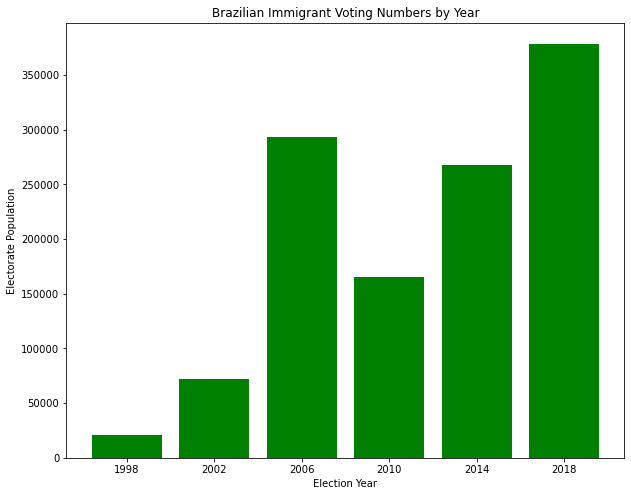

In [83]:
plot_total_votes(df_combined)

In [84]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()

    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries that saw Brazilian immigrants vote by Year")

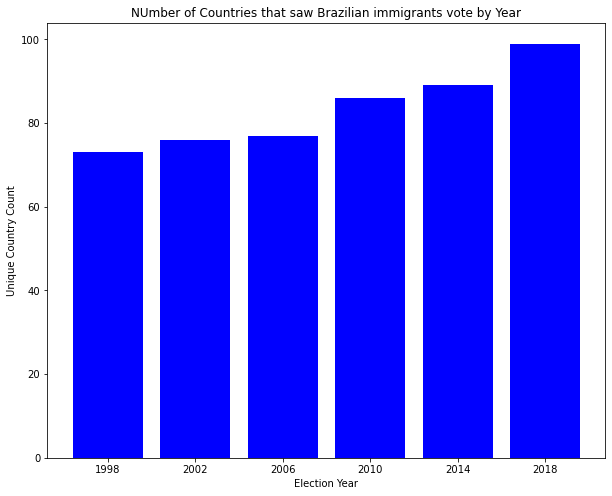

In [85]:
plot_total_countries(df_combined)

In [86]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    
    return countries

In [87]:
countries = calculate_country_pop(df_combined)

In [88]:
countries1 = countries.sort_values(by=[1998], ascending=False)
countries1.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
11800             BOLIVIA            1115.0   1562.0   4699.0   1935.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
11525             SUICA               905.0   1469.0   7310.0   7357.0   
11282             FRANCA              881.0   2038.0   8661.0   3895.0   
11320             GUIANA FRANCESA     753.0   1653.0   7856.0   3454.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11363             ITALIA             12943.0   15519.0  
11509             PORTUGAL           19295.0   24980.0  
11100             ALEMANHA           11780.0   16996.0  
11800             BOLIVIA             2462.0    3080.0  
98906             CANADA             13819.0   23852.0  
11525             SUICA              11771.0   15620.0  
11282             FRANCA              6227.0    8732.0  
11320             GUIANA FRANCESA     3564.0    3025.0  
98841             INGLATERRA         11627.0   17848.0

In [89]:
countries2 = countries.sort_values(by=[2002], ascending=False)
countries2.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
11282             FRANCA              881.0   2038.0   8661.0   3895.0   
11320             GUIANA FRANCESA     753.0   1653.0   7856.0   3454.0   
11800             BOLIVIA            1115.0   1562.0   4699.0   1935.0   
11240             ESPANHA             341.0   1547.0   5235.0   3853.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11509             PORTUGAL           19295.0   24980.0  
11363             ITALIA             12943.0   15519.0  
98841             INGLATERRA         11627.0   17848.0  
11100             ALEMANHA           11780.0   16996.0  
98906             CANADA             13819.0   23852.0  
11282             FRANCA              6227.0    8732.0  
11320             GUIANA FRANCESA     3564.0    3025.0  
11800             BOLIVIA             2462.0    3080.0  
11240             ESPANHA             6143.0   10937.0

In [90]:
countries3 = countries.sort_values(by=[2006], ascending=False)
countries3.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
11444             PARAGUAI            458.0   1332.0  10047.0   4547.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
11282             FRANCA              881.0   2038.0   8661.0   3895.0   
11320             GUIANA FRANCESA     753.0   1653.0   7856.0   3454.0   
11142             ARGENTINA           424.0   1088.0   7732.0   4577.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11509             PORTUGAL           19295.0   24980.0  
11363             ITALIA             12943.0   15519.0  
98841             INGLATERRA         11627.0   17848.0  
98906             CANADA             13819.0   23852.0  
11444             PARAGUAI            6769.0    8450.0  
11100             ALEMANHA           11780.0   16996.0  
11282             FRANCA              6227.0    8732.0  
11320             GUIANA FRANCESA     3564.0    3025.0  
11142             ARGENTINA           5431.0    6856.0

In [91]:
countries4 = countries.sort_values(by=[2010], ascending=False)
countries4.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
11380             JAPAO               254.0    532.0   1666.0  12063.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
11525             SUICA               905.0   1469.0   7310.0   7357.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
11142             ARGENTINA           424.0   1088.0   7732.0   4577.0   
11444             PARAGUAI            458.0   1332.0  10047.0   4547.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11509             PORTUGAL           19295.0   24980.0  
11380             JAPAO              42402.0   59676.0  
11363             ITALIA             12943.0   15519.0  
98906             CANADA             13819.0   23852.0  
11525             SUICA              11771.0   15620.0  
98841             INGLATERRA         11627.0   17848.0  
11100             ALEMANHA           11780.0   16996.0  
11142             ARGENTINA           5431.0    6856.0  
11444             PARAGUAI            6769.0    8450.0

In [92]:
countries5 = countries.sort_values(by=[2014], ascending=False)
countries5.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11380             JAPAO               254.0    532.0   1666.0  12063.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
11525             SUICA               905.0   1469.0   7310.0   7357.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   
11444             PARAGUAI            458.0   1332.0  10047.0   4547.0   
11282             FRANCA              881.0   2038.0   8661.0   3895.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11380             JAPAO              42402.0   59676.0  
11509             PORTUGAL           19295.0   24980.0  
98906             CANADA             13819.0   23852.0  
11363             ITALIA             12943.0   15519.0  
11100             ALEMANHA           11780.0   16996.0  
11525             SUICA              11771.0   15620.0  
98841             INGLATERRA         11627.0   17848.0  
11444             PARAGUAI            6769.0    8450.0  
11282             FRANCA              6227.0    8732.0

In [93]:
countries6 = countries.sort_values(by=[2018], ascending=False)
countries6.head(10)

election_year                          1998     2002     2006     2010  \
municipality_code municipality_name                                      
11266             ESTADOS UNIDOS     4345.0  26772.0  97985.0  51820.0   
11380             JAPAO               254.0    532.0   1666.0  12063.0   
11509             PORTUGAL           1502.0   7343.0  27822.0  15087.0   
98906             CANADA              911.0   2196.0  11214.0   7749.0   
98841             INGLATERRA          590.0   3217.0  12640.0   6192.0   
11100             ALEMANHA           1359.0   2584.0   9750.0   6119.0   
11525             SUICA               905.0   1469.0   7310.0   7357.0   
11363             ITALIA             1940.0   4518.0  16616.0  10564.0   
11240             ESPANHA             341.0   1547.0   5235.0   3853.0   
11282             FRANCA              881.0   2038.0   8661.0   3895.0   

election_year                           2014      2018  
municipality_code municipality_name                     
11266             ESTADOS UNIDOS     75862.0  107078.0  
11380             JAPAO              42402.0   59676.0  
11509             PORTUGAL           19295.0   24980.0  
98906             CANADA             13819.0   23852.0  
98841             INGLATERRA         11627.0   17848.0  
11100             ALEMANHA           11780.0   16996.0  
11525             SUICA              11771.0   15620.0  
11363             ITALIA             12943.0   15519.0  
11240             ESPANHA             6143.0   10937.0  
11282             FRANCA              6227.0    8732.0

In [94]:
def votes_by_party(df):
    countries = df.groupby(["party_name", "party_initials", "election_year"]).number_of_votes.sum().unstack()
    countries = countries.fillna(0)
    
    
    return countries

In [95]:
votings = votes_by_party(df_combined)
votings = votings.sort_values(by=[1998], ascending=False)
votings

election_year                                                     1998  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            13848.0   
PARTIDO DOS TRABALHADORES                      PT               4885.0   
PARTIDO POPULAR SOCIALISTA                     PPS              1407.0   
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL      PRONA             307.0   
PARTIDO VERDE                                  PV                118.0   
PARTIDO TRABALHISTA DO BRASIL                  PT do B            86.0   
PARTIDO TRABALHISTA NACIONAL                   PTN                85.0   
PARTIDO DA MOBILIZACAO NACIONAL                PMN                61.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU               45.0   
PARTIDO DA SOLIDARIEDADE NACIONAL              PSN                34.0   
PARTIDO SOCIAL CRISTAO                         PSC                23.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC               17.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PATRIOTA                                       PATRI               0.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                 0.0   
PODEMOS                                        PODE                0.0   
DEMOCRACIA CRISTA                              DC                  0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO SOCIAL LIBERAL                         PSL                 0.0   
PARTIDO REPUBLICANO PROGRESSISTA               PRP                 0.0   
MOVIMENTO DEMOCRATICO BRASILEIRO               MDB                 0.0   
PARTIDO PATRIA LIVRE                           PPL                 0.0   
PARTIDO NOVO                                   NOVO                0.0   
PARTIDO DEMOCRATICO TRABALHISTA                PDT                 0.0   
PARTIDO DA CAUSA OPERARIA                      PCO                 0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   
REDE SUSTENTABILIDADE                          REDE                0.0   

election_year                                                     2002  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            23960.0   
PARTIDO DOS TRABALHADORES                      PT              39365.0   
PARTIDO POPULAR SOCIALISTA                     PPS              4342.0   
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL      PRONA               0.0   
PARTIDO VERDE                                  PV                  0.0   
PARTIDO TRABALHISTA DO BRASIL                  PT do B             0.0   
PARTIDO TRABALHISTA NACIONAL                   PTN                 0.0   
PARTIDO DA MOBILIZACAO NACIONAL                PMN                 0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              204.0   
PARTIDO DA SOLIDARIEDADE NACIONAL              PSN                 0.0   
PARTIDO SOCIAL CRISTAO                         PSC                 0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC                0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PATRIOTA                                       PATRI               0.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB              3675.0   
PODEMOS                                        PODE                0.0   
DEMOCRACIA CRISTA                              DC                  0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO SOCIAL LIBERAL                         PSL                 0.0   
PARTIDO REPUBLICANO PROGRESSISTA               PRP                 0.0   
MOVIMENTO DEMOCRATICO BRASILEIRO               MDB                 0.0   
PARTIDO PATRIA LIVRE                           PPL                 0.0   
PARTIDO NOVO                                   NOVO                0.0   
PAR

In [96]:
votings = votings.sort_values(by=[2002], ascending=False)
votings.head(10)

election_year                                                     1998  \
party_name                                     party_initials            
PARTIDO DOS TRABALHADORES                      PT               4885.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            13848.0   
PARTIDO POPULAR SOCIALISTA                     PPS              1407.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                 0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU               45.0   
PARTIDO DA CAUSA OPERARIA                      PCO                 0.0   
DEMOCRACIA CRISTA                              DC                  0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   
PARTIDO DEMOCRATICO TRABALHISTA                PDT                 0.0   
PARTIDO NOVO                                   NOVO                0.0   

election_year                                                     2002  \
party_name                                     party_initials            
PARTIDO DOS TRABALHADORES                      PT              39365.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            23960.0   
PARTIDO POPULAR SOCIALISTA                     PPS              4342.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB              3675.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              204.0   
PARTIDO DA CAUSA OPERARIA                      PCO               102.0   
DEMOCRACIA CRISTA                              DC                  0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   
PARTIDO DEMOCRATICO TRABALHISTA                PDT                 0.0   
PARTIDO NOVO                                   NOVO                0.0   

election_year                                                      2006  \
party_name                                     party_initials             
PARTIDO DOS TRABALHADORES                      PT              133996.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            153700.0   
PARTIDO POPULAR SOCIALISTA                     PPS                  0.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                  0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU                 0.0   
PARTIDO DA CAUSA OPERARIA                      PCO                  0.0   
DEMOCRACIA CRISTA                              DC                   0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                  0.0   
PARTIDO DEMOCRATICO TRABALHISTA                PDT               1822.0   
PARTIDO NOVO                                   NOVO                 0.0   

election_year                                                     2010  \
party_name                                     party_initials            
PARTIDO DOS TRABALHADORES                      PT              64148.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            81846.0   
PARTIDO POPULAR SOCIALISTA                     PPS                 0.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                 0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              541.0   
PARTIDO DA CAUSA OPERARIA                      PCO                68.0   
DEMOCRACIA CRISTA                              DC                  0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB               253.0   
PARTIDO DEMOCRATICO TRABALHISTA                PDT                 0.0   
PARTIDO NOVO                                   NOVO                0.0   

election_year                                                      2014  \
party_name                                     party_initials             
PARTIDO DOS TRABALHADORES                      PT               55412.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            169834.0   
PARTIDO POPULAR SOCIALISTA                     PPS                  0.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB       

In [97]:
votings = votings.sort_values(by=[2006], ascending=False)
votings.head(10)

election_year                                                1998     2002  \
party_name                                party_initials                     
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA   PSDB            13848.0  23960.0   
PARTIDO DOS TRABALHADORES                 PT               4885.0  39365.0   
PARTIDO SOCIALISMO E LIBERDADE            PSOL                0.0      0.0   
PARTIDO DEMOCRATICO TRABALHISTA           PDT                 0.0      0.0   
PARTIDO REPUBLICANO PROGRESSISTA          PRP                 0.0      0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO          PSDC               17.0      0.0   
PARTIDO SOCIAL LIBERAL                    PSL                 0.0      0.0   
PARTIDO COMUNISTA BRASILEIRO              PCB                 0.0      0.0   
DEMOCRACIA CRISTA                         DC                  0.0      0.0   
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL PRONA             307.0      0.0   

election_year                                                 2006     2010  \
party_name                                party_initials                      
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA   PSDB            153700.0  81846.0   
PARTIDO DOS TRABALHADORES                 PT              133996.0  64148.0   
PARTIDO SOCIALISMO E LIBERDADE            PSOL              3294.0    693.0   
PARTIDO DEMOCRATICO TRABALHISTA           PDT               1822.0      0.0   
PARTIDO REPUBLICANO PROGRESSISTA          PRP                637.0      0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO          PSDC               131.0    357.0   
PARTIDO SOCIAL LIBERAL                    PSL                129.0      0.0   
PARTIDO COMUNISTA BRASILEIRO              PCB                  0.0    253.0   
DEMOCRACIA CRISTA                         DC                   0.0      0.0   
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL PRONA                0.0      0.0   

election_year                                                 2014      2018  
party_name                                party_initials                      
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA   PSDB            169834.0    6668.0  
PARTIDO DOS TRABALHADORES                 PT               55412.0   73270.0  
PARTIDO SOCIALISMO E LIBERDADE            PSOL              3474.0    1274.0  
PARTIDO DEMOCRATICO TRABALHISTA           PDT                  0.0   28073.0  
PARTIDO REPUBLICANO PROGRESSISTA          PRP                  0.0       0.0  
PARTIDO SOCIAL DEMOCRATA CRISTAO          PSDC               281.0       0.0  
PARTIDO SOCIAL LIBERAL                    PSL                  0.0  245361.0  
PARTIDO COMUNISTA BRASILEIRO              PCB                261.0       0.0  
DEMOCRACIA CRISTA                         DC                   0.0     179.0  
PARTIDO DA REEDIFICACAO DA ORDEM NACIONAL PRONA                0.0       0.0

In [98]:
votings = votings.sort_values(by=[2010], ascending=False)
votings.head(10)

election_year                                                     1998  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            13848.0   
PARTIDO DOS TRABALHADORES                      PT               4885.0   
PARTIDO VERDE                                  PV                118.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU               45.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC               17.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO DA CAUSA OPERARIA                      PCO                 0.0   
PARTIDO POPULAR SOCIALISTA                     PPS              1407.0   

election_year                                                     2002  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            23960.0   
PARTIDO DOS TRABALHADORES                      PT              39365.0   
PARTIDO VERDE                                  PV                  0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              204.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC                0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO DA CAUSA OPERARIA                      PCO               102.0   
PARTIDO POPULAR SOCIALISTA                     PPS              4342.0   

election_year                                                      2006  \
party_name                                     party_initials             
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            153700.0   
PARTIDO DOS TRABALHADORES                      PT              133996.0   
PARTIDO VERDE                                  PV                   0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL              3294.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU                 0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC               131.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                  0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                 0.0   
PARTIDO DA CAUSA OPERARIA                      PCO                  0.0   
PARTIDO POPULAR SOCIALISTA                     PPS                  0.0   

election_year                                                     2010  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            81846.0   
PARTIDO DOS TRABALHADORES                      PT              64148.0   
PARTIDO VERDE                                  PV              17222.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL              693.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              541.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC              357.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB               253.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB              200.0   
PARTIDO DA CAUSA OPERARIA                      PCO                68.0   
PARTIDO POPULAR SOCIALISTA                     PPS                 0.0   

election_year                                                      2014  \
party_name                                     party_initials             
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            169834.0   
PARTIDO DOS TRABALHADORES                      PT               55412.0   
PARTIDO VERDE                                  PV                2067.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL      

In [99]:
votings = votings.sort_values(by=[2014], ascending=False)
votings.head(10)

election_year                                                     1998  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            13848.0   
PARTIDO DOS TRABALHADORES                      PT               4885.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                 0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PARTIDO VERDE                                  PV                118.0   
PARTIDO SOCIAL CRISTAO                         PSC                23.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU               45.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC               17.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   

election_year                                                     2002  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            23960.0   
PARTIDO DOS TRABALHADORES                      PT              39365.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB              3675.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL                0.0   
PARTIDO VERDE                                  PV                  0.0   
PARTIDO SOCIAL CRISTAO                         PSC                 0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              204.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC                0.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                 0.0   

election_year                                                      2006  \
party_name                                     party_initials             
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            153700.0   
PARTIDO DOS TRABALHADORES                      PT              133996.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                  0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL              3294.0   
PARTIDO VERDE                                  PV                   0.0   
PARTIDO SOCIAL CRISTAO                         PSC                  0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU                 0.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB                 0.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC               131.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB                  0.0   

election_year                                                     2010  \
party_name                                     party_initials            
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            81846.0   
PARTIDO DOS TRABALHADORES                      PT              64148.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB                 0.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL              693.0   
PARTIDO VERDE                                  PV              17222.0   
PARTIDO SOCIAL CRISTAO                         PSC                 0.0   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO PSTU              541.0   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO       PRTB              200.0   
PARTIDO SOCIAL DEMOCRATA CRISTAO               PSDC              357.0   
PARTIDO COMUNISTA BRASILEIRO                   PCB               253.0   

election_year                                                      2014  \
party_name                                     party_initials             
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA        PSDB            169834.0   
PARTIDO DOS TRABALHADORES                      PT               55412.0   
PARTIDO SOCIALISTA BRASILEIRO                  PSB              34527.0   
PARTIDO SOCIALISMO E LIBERDADE                 PSOL      

In [100]:
votings = votings.sort_values(by=[2018], ascending=False)
votings.head(10)

election_year                                              1998     2002  \
party_name                              party_initials                     
PARTIDO SOCIAL LIBERAL                  PSL                 0.0      0.0   
PARTIDO DOS TRABALHADORES               PT               4885.0  39365.0   
PARTIDO DEMOCRATICO TRABALHISTA         PDT                 0.0      0.0   
PARTIDO NOVO                            NOVO                0.0      0.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA PSDB            13848.0  23960.0   
REDE SUSTENTABILIDADE                   REDE                0.0      0.0   
PODEMOS                                 PODE                0.0      0.0   
PARTIDO SOCIALISMO E LIBERDADE          PSOL                0.0      0.0   
PATRIOTA                                PATRI               0.0      0.0   
MOVIMENTO DEMOCRATICO BRASILEIRO        MDB                 0.0      0.0   

election_year                                               2006     2010  \
party_name                              party_initials                      
PARTIDO SOCIAL LIBERAL                  PSL                129.0      0.0   
PARTIDO DOS TRABALHADORES               PT              133996.0  64148.0   
PARTIDO DEMOCRATICO TRABALHISTA         PDT               1822.0      0.0   
PARTIDO NOVO                            NOVO                 0.0      0.0   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA PSDB            153700.0  81846.0   
REDE SUSTENTABILIDADE                   REDE                 0.0      0.0   
PODEMOS                                 PODE                 0.0      0.0   
PARTIDO SOCIALISMO E LIBERDADE          PSOL              3294.0    693.0   
PATRIOTA                                PATRI                0.0      0.0   
MOVIMENTO DEMOCRATICO BRASILEIRO        MDB                  0.0      0.0   

election_year                                               2014      2018  
party_name                              party_initials                      
PARTIDO SOCIAL LIBERAL                  PSL                  0.0  245361.0  
PARTIDO DOS TRABALHADORES               PT               55412.0   73270.0  
PARTIDO DEMOCRATICO TRABALHISTA         PDT                  0.0   28073.0  
PARTIDO NOVO                            NOVO                 0.0   13637.0  
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA PSDB            169834.0    6668.0  
REDE SUSTENTABILIDADE                   REDE                 0.0    4961.0  
PODEMOS                                 PODE                 0.0    2733.0  
PARTIDO SOCIALISMO E LIBERDADE          PSOL              3474.0    1274.0  
PATRIOTA                                PATRI                0.0    1172.0  
MOVIMENTO DEMOCRATICO BRASILEIRO        MDB                  0.0     952.0

## Voting By Party
### All Datasets
Below, we can see the number of votes for each party over the 6 election years in the dataset. Overall, the PSDB and PT have received the most votes in the last 6 elections, with the PSL coming in 3rd.

<AxesSubplot:title={'center':'Votes by Party 1998-2018'}, xlabel='party_initials'>

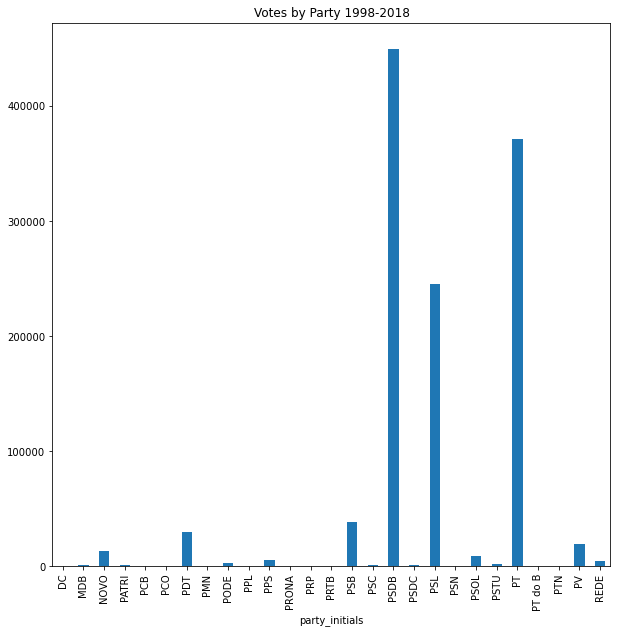

In [101]:
votings_overall.plot(kind="bar", figsize=(10,10), title="Votes by Party 1998-2018")

### Last 4 Elections
Now, if we narrow our focus to the last 4 elections, we can see that while the PSDB and PT were the top two parties in 2006-2014, the PSL emerged as the overwhelming top party in 2018

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

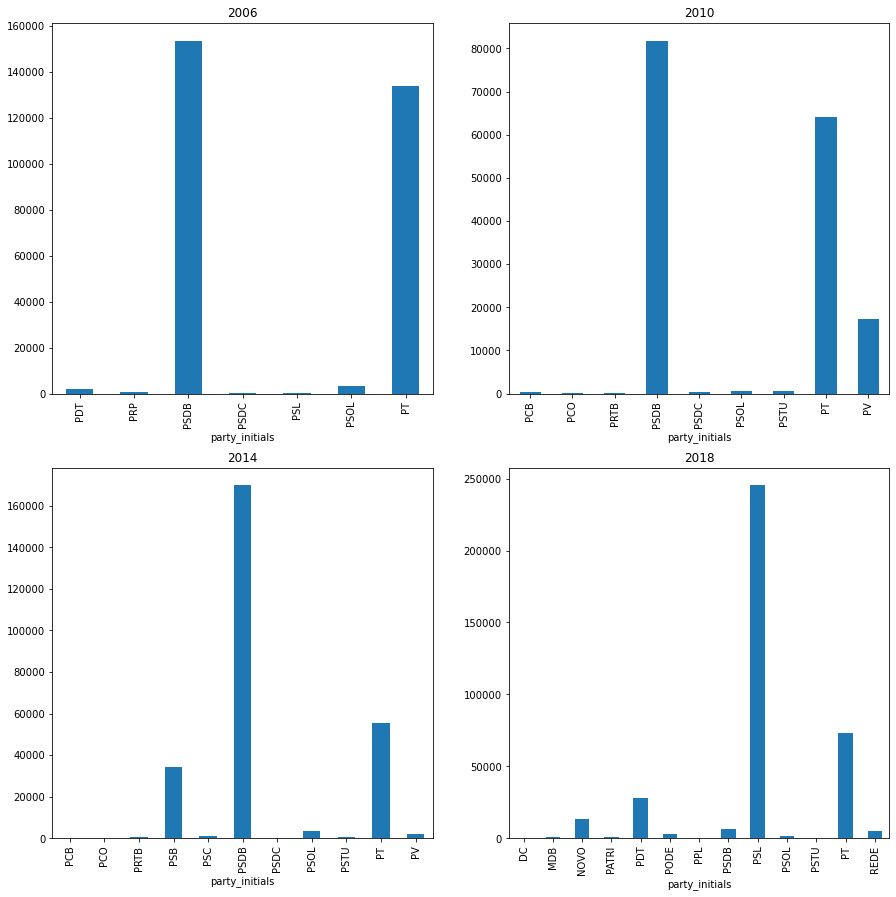

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

df_combined[df_combined["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
df_combined[df_combined["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
df_combined[df_combined["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
df_combined[df_combined["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")

## Analysis of Voting Patterns in Top 10 Countries

In [103]:
def get_electorate_data():
    '''
    Retrieves and combines electorate dataset (to get data on top 10 countries)
    :return: The combined electorate data
    '''
    df_1998 = pd.read_csv('../data/clean/perfil_eleitorado_1998.csv')
    df_2002 = pd.read_csv('../data/clean/perfil_eleitorado_2002.csv')
    df_2006 = pd.read_csv('../data/clean/perfil_eleitorado_2006.csv')
    df_2010 = pd.read_csv('../data/clean/perfil_eleitorado_2010.csv')
    df_2014 = pd.read_csv('../data/clean/perfil_eleitorado_2014.csv')
    df_2018 = pd.read_csv('../data/clean/perfil_eleitorado_2018.csv')
    
    df = combine_data(df_1998, df_2002, df_2006, df_2010, df_2014, df_2018)
    
    return df

In [104]:
def get_top_N(total_data, N:int):
    '''
    Extracts the top N countries (in terms of overall population) by 
    countries
    :param total_data - The aggregate dataset (df_combined in our case)
    :param sorted_countries - A sorted dataframe of dataset elements (in our case, elements
                              sorted by total number of voters in 2018)
    :param N - The number of countries to extract
    :return A new dataframe containing only the top N countries
    '''
    
    #Extract Names of top 10 countries
    electorate = get_electorate_data()
    countries = electorate.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    countries = countries.fillna(0)
    sorted_countries = countries.sort_values(by=[2018], ascending=False)
    
    top_N_country_names = list(pd.DataFrame(sorted_countries.reset_index()).municipality_name[:N])
    
    #Filter dataframe to only include top 10 countries
    #Source - https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
    top_N = total_data[pd.DataFrame(total_data["municipality_name"].tolist()).isin(top_N_country_names).any(1).values].reset_index()
    
    top_N = top_N[["election_year", "election_round","municipality_code","municipality_name", "office", "party_initials", "party_number","party_name", "number_of_votes" ]]

    
    return top_N

In [105]:
top_10 = get_top_N(df_combined, 10)
top_10

election_year  election_round  municipality_code municipality_name  \
0              1998               1              11100          ALEMANHA   
1              1998               1              11100          ALEMANHA   
2              1998               1              11100          ALEMANHA   
3              1998               1              11100          ALEMANHA   
4              1998               1              11100          ALEMANHA   
5              1998               1              11100          ALEMANHA   
6              1998               1              11100          ALEMANHA   
7              1998               1              11100          ALEMANHA   
8              1998               1              11100          ALEMANHA   
9              1998               1              11100          ALEMANHA   
10             1998               1              11100          ALEMANHA   
11             1998               1              11100          ALEMANHA   
12             1998               1              11100          ALEMANHA   
13             1998               1              11100          ALEMANHA   
14             1998               1              11100          ALEMANHA   
15             1998               1              11100          ALEMANHA   
16             1998               1              11100          ALEMANHA   
17             1998               1              11100          ALEMANHA   
18             1998               1              11100          ALEMANHA   
19             1998               1              11100          ALEMANHA   
20             1998               1              11100          ALEMANHA   
21             1998               1              11100          ALEMANHA   
22             1998               1              11100          ALEMANHA   
23             1998               1              11100          ALEMANHA   
24             1998               1              11100          ALEMANHA   
25             1998               1              11100          ALEMANHA   
26             1998               1              11100          ALEMANHA   
27             1998               1              11100          ALEMANHA   
28             1998               1              11100          ALEMANHA   
29             1998               1              11100          ALEMANHA   
30             1998               1              11100          ALEMANHA   
31             1998               1              11100          ALEMANHA   
32             1998               1              11100          ALEMANHA   
33             1998               1              11100          ALEMANHA   
34             1998               1              11100          ALEMANHA   
35             1998               1              11100          ALEMANHA   
36             1998               1              11100          ALEMANHA   
37             1998               1              11100          ALEMANHA   
38             1998               1              11100          ALEMANHA   
39             1998               1              11100          ALEMANHA   
40             1998               1              98906            CANADA   
41             1998               1              98906            CANADA   
42             1998               1              98906            CANADA   
43             1998               1              98906            CANADA   
44             1998               1              98906            CANADA   
45             1998               1              98906            CANADA   
46             1998               1              98906            CANADA   
47             1998               1              98906            CANADA   
48             1998               1              98906            CANADA   
49             1998               1              98906            CANADA   
50             1998               1              98906            CANADA   
51             1998               1              98906

### Below, we can see the total votes for each political party by country in our entire dataset

In [106]:
# top_10_votes = top_10.groupby(["party_name", "municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10.groupby(["municipality_name", "party_initials","election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
top_10_votes

election_year                       1998     2002     2006     2010     2014  \
municipality_name party_initials                                               
ALEMANHA          DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0     18.0     13.0   
                  PCO                0.0      6.0      0.0     11.0      2.0   
                  PDT                0.0      0.0     63.0      0.0      0.0   
                  PMN                5.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               90.0    109.0      0.0      0.0      0.0   
                  PRONA             16.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     25.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      9.0     24.0   
                  PSB                0.0     42.0      0.0      0.0   1885.0   
                  PSC                0.0      0.0      0.0      0.0     34.0   
                  PSDB             799.0    799.0   5204.0   2760.0   6152.0   
                  PSDC               1.0      0.0      4.0     18.0     14.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSN                3.0      0.0      0.0      0.0      0.0   
                  PSOL               0.0      0.0     96.0     26.0    282.0   
                  PSTU               4.0      4.0      0.0     29.0     33.0   
                  PT               417.0   1624.0   4352.0   2420.0   3171.0   
                  PT do B            8.0      0.0      0.0      0.0      0.0   
                  PTN                8.0      0.0      0.0      0.0      0.0   
                  PV                 8.0      0.0      0.0    828.0    170.0   
                  REDE               0.0      0.0      0.0      0.0      0.0   
CANADA            DC                 0.0      0.0      0.0      0.0      0.0   
                  MDB                0.0      0.0      0.0      0.0      0.0   
                  NOVO               0.0      0.0      0.0      0.0      0.0   
                  PATRI              0.0      0.0      0.0      0.0      0.0   
                  PCB                0.0      0.0      0.0      8.0     10.0   
                  PCO                0.0      2.0      0.0      2.0      0.0   
                  PDT                0.0      0.0    109.0      0.0      0.0   
                  PMN                2.0      0.0      0.0      0.0      0.0   
                  PODE               0.0      0.0      0.0      0.0      0.0   
                  PPL                0.0      0.0      0.0      0.0      0.0   
                  PPS               52.0     99.0      0.0      0.0      0.0   
                  PRONA              9.0      0.0      0.0      0.0      0.0   
                  PRP                0.0      0.0     12.0      0.0      0.0   
                  PRTB               0.0      0.0      0.0      8.0     17.0   
                  PSB                0.0     37.0      0.0      0.0   1700.0   
                  PSC                2.0      0.0      0.0      0.0     34.0   
                  PSDB             585.0    769.0   6816.0   4408.0   9167.0   
                  PSDC               0.0      0.0      4.0      8.0     15.0   
                  PSL                0.0      0.0      6.0      0.0      0.0   
                  PSOL               0.0      0.0    119.0     24.0    286.0   
                  PSTU               2.0      6.0      0.0     11.0      8.0   


### First, let's look at the total number of votes for these 10 countries by political party. As we can see below,  the PSDB has received the most votes from these countries, followed by the PT and PSL

<AxesSubplot:xlabel='party_initials'>

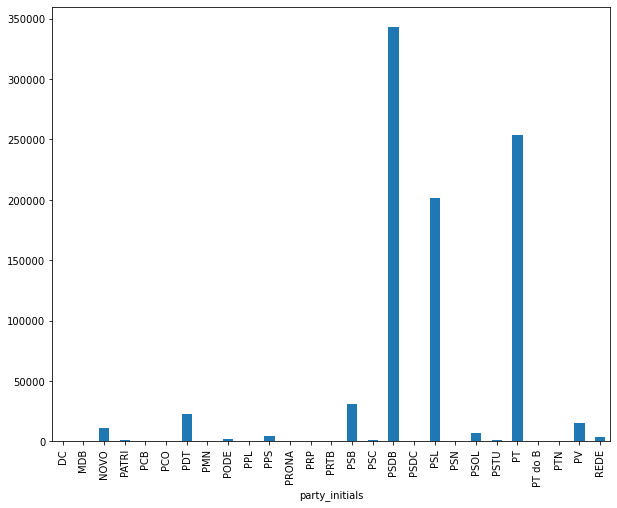

In [107]:
top_10_votes = top_10.groupby(["party_initials","municipality_name", "election_year"]).number_of_votes.sum().unstack()
top_10_votes = top_10_votes.fillna(0)
parties = top_10["party_initials"].unique()
top_10.groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar")
# top_10_votes.groupby(["municipality_name"]).plot(legend=True, grid=True, figsize=(20,10))

#### Now, let's look at trend over the past 4 elections
Here, we can see that the PSDB received the most votes in 2006-2014, but received very few votes in 2018 (in which the PSL received the most votes)

<AxesSubplot:title={'center':'2018'}, xlabel='party_initials'>

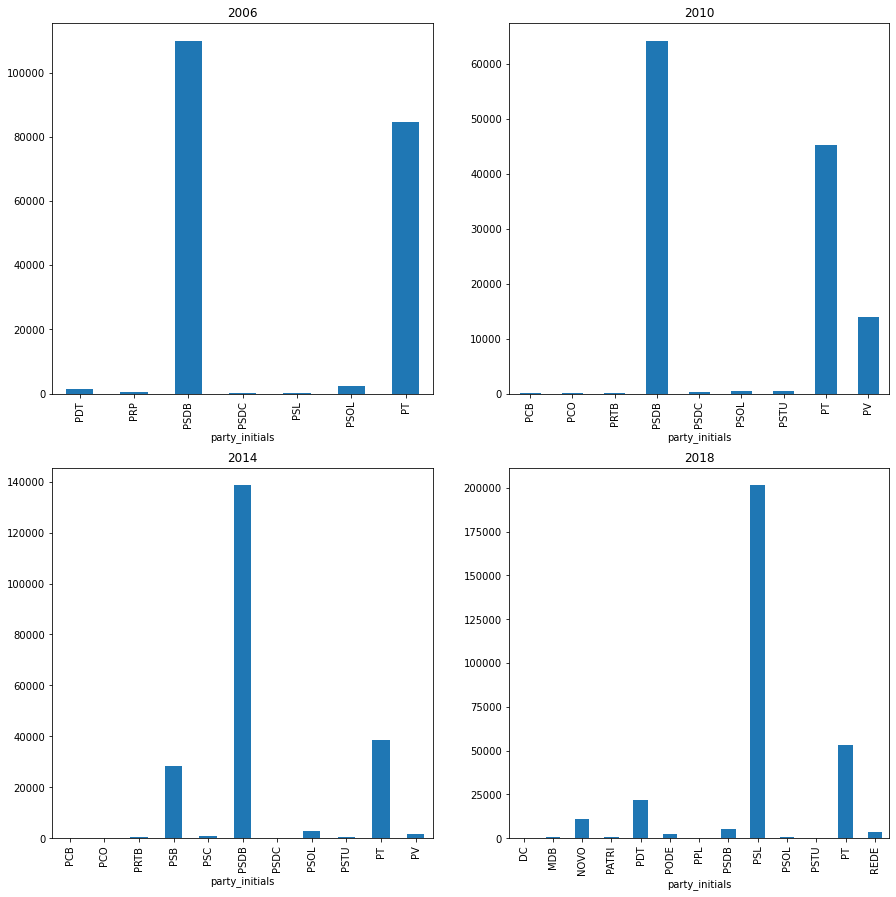

In [108]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

top_10[top_10["election_year"] == 2006].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][0], title="2006")
top_10[top_10["election_year"] == 2010].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[0][1], title="2010")
top_10[top_10["election_year"] == 2014].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][0], title="2014")
top_10[top_10["election_year"] == 2018].groupby(["party_initials"]).number_of_votes.sum().plot(kind="bar", ax=axes[1][1], title="2018")


#### Now, let's look at votes for the individual countries in these years



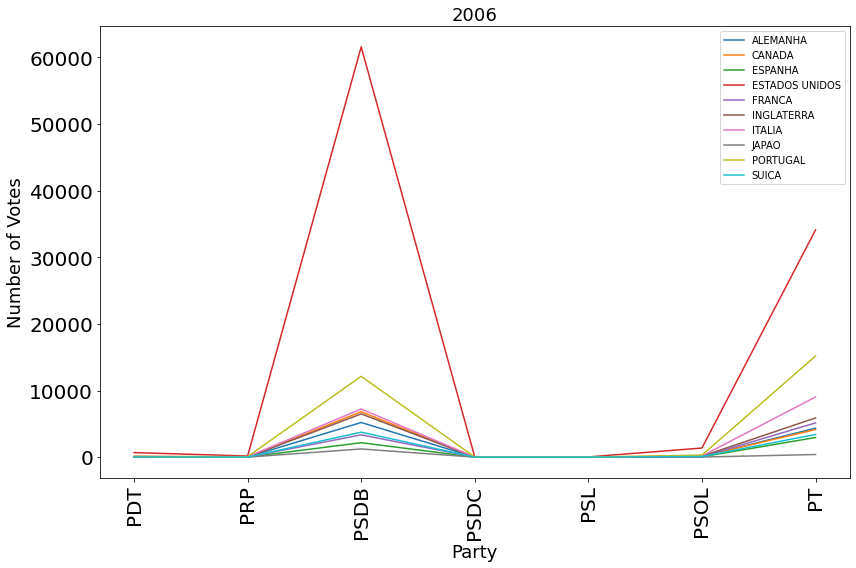

In [109]:
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2006)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


plt.figure(figsize=(12,8))
#2006
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2006) & (top_10["municipality_name"]==country)]
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)


plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Number of Votes", fontsize=18)
plt.title("2006", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2006.png", facecolor='w')
        


#### 2006
Above, we plot the voting results for each country for the year 2006. We see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Interestingly, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB

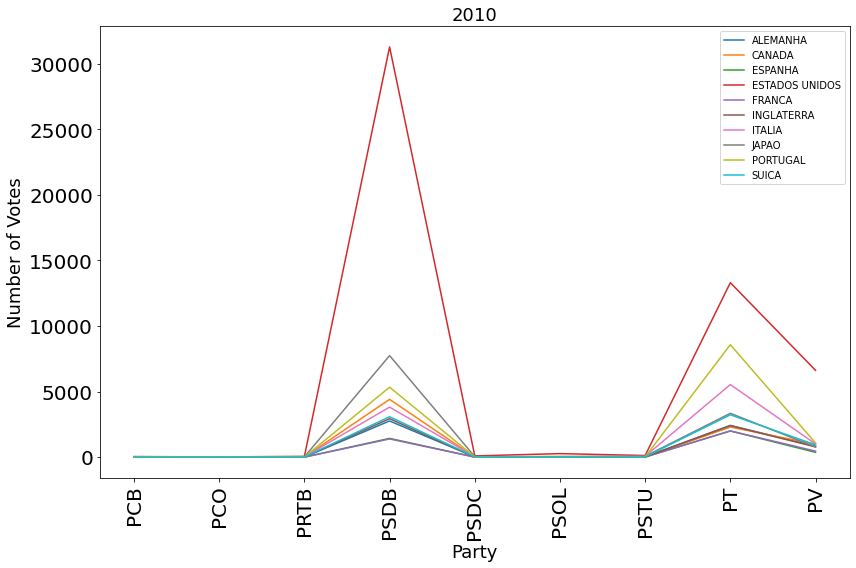

In [110]:
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2010)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


plt.figure(figsize=(12,8))
#2006
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2010) & (top_10["municipality_name"]==country)]
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)


plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Number of Votes", fontsize=18)
plt.title("2010", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2010.png", facecolor='w')
        


#### 2010
Above, we plot the voting results for each country for the year 2010. Again, we see a relatively uniform pattern among all countries, with the majority of votes going to the PDSB and PT. Again, a the PT seemed to garner more votes in Portugal, Italy, and France than did the PSDB and interestingly, the PV garnered a significant number of votes in the US.

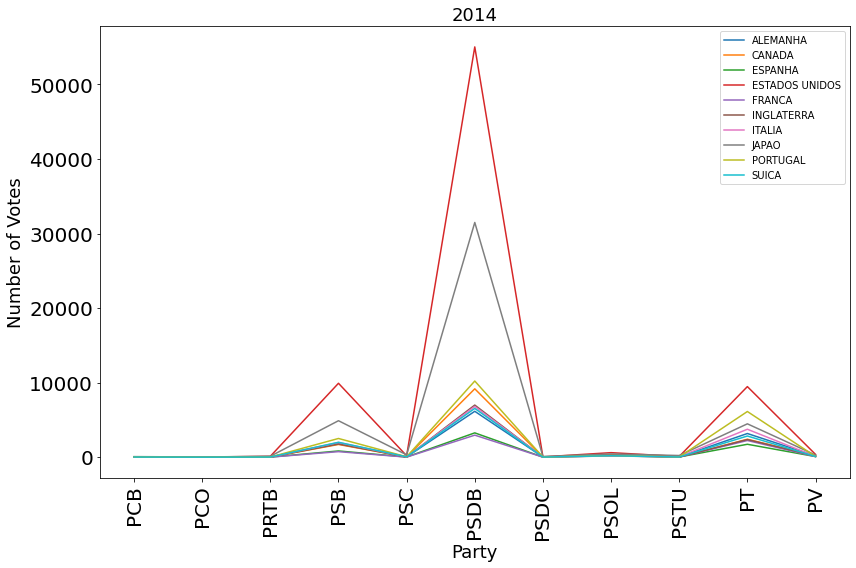

In [111]:
countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2014)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


plt.figure(figsize=(12,8))
#2006
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2014) & (top_10["municipality_name"]==country)]
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)


plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Number of Votes", fontsize=18)
plt.title("2014", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2014.png", facecolor='w')

#### 2014
In 2014, we see the number of votes for the PT fall dramatically (relative to the PSDB). Meanwhile, votes for the PSB have grown significantly, with the votes for the PSB on par with the PT in the US and votes for the PT outnumbering those for the PT in Japan 

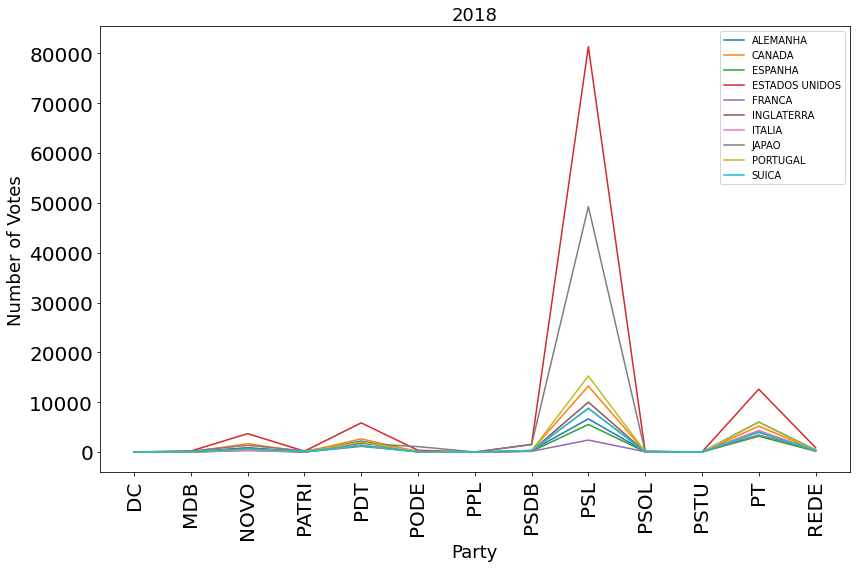

In [112]:
# countries = top_10.municipality_name.unique()
parties = top_10[(top_10["election_year"] == 2018)].party_initials.unique()
parties.sort()
votes = [0 for i in range(len(parties))]


plt.figure(figsize=(12,8))
for country in countries:
    country_data = top_10[(top_10["election_year"] == 2018) & (top_10["municipality_name"]==country)]
    for idx, party in enumerate(parties):
        vote_total = country_data[country_data["party_initials"] == party].number_of_votes.sum()
        votes[idx] = vote_total
    
    plt.plot(parties, votes, label=country)


plt.xticks(parties, [str(i) for i in parties], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.legend(loc='best', prop={'size': 10})
plt.xlabel("Party", fontsize=18)
plt.ylabel("Number of Votes", fontsize=18)
plt.title("2018", fontsize=18)
plt.tight_layout()
# plt.savefig("../readme_images/top10_votes_2018.png", facecolor='w')

#### 2018
In 2018, the PSL became the most-voted-for party across almost all countries. We also see some small spikes in votes for the new NOVO and PDT parties. Meanwhile, the PSDB has very few votes in all countries, while the PT continues to have some support on par with 2014 (much reduced from 2006 and 2010).